In [18]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [2]:
gold=pd.read_csv('/content/gld_price_data.csv')
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_new=gold.drop(['Date'],axis=1)
gold_new

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
gold_new.shape
gold_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [6]:
x=gold_new.drop(['GLD'],axis=1)
y=gold_new['GLD']

In [7]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [8]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
rfr=RandomForestRegressor()

In [14]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

In [15]:
t_pred=rfr.predict(xtest)
t_pred

array([126.94739885, 116.77629931, 140.06540032, 122.11430046,
        94.61100111, 154.28600122, 117.89440076, 113.41070141,
       152.86760079, 105.64100038, 103.24149915, 120.2441006 ,
        91.97559932, 158.1902007 , 121.54329834, 117.24460106,
        86.33219798,  91.87869954,  93.04860011, 125.9453001 ,
        83.86729957, 117.65109876, 126.10439834, 173.24149714,
       169.41689717, 139.96830234, 114.63869943, 159.93170165,
       133.53260081, 116.2463004 , 111.14250089, 104.9364019 ,
       128.23840071, 122.0291989 ,  98.80579964, 120.0522001 ,
        83.35680034, 115.19060005, 127.42459904, 140.65219834,
       107.38640081, 131.44570048, 108.75159849, 134.1528    ,
       133.28429932, 149.07149911, 119.63630071, 156.89640066,
       157.05150156, 127.7244995 , 123.19820065, 114.74769865,
       124.33570016, 118.97449981, 153.8780006 , 121.39769965,
       112.09850051,  86.71119927, 156.08190018, 118.15140099,
        88.35349989, 114.71059987,  83.67729892, 146.20

In [16]:
y_pred=list(t_pred)

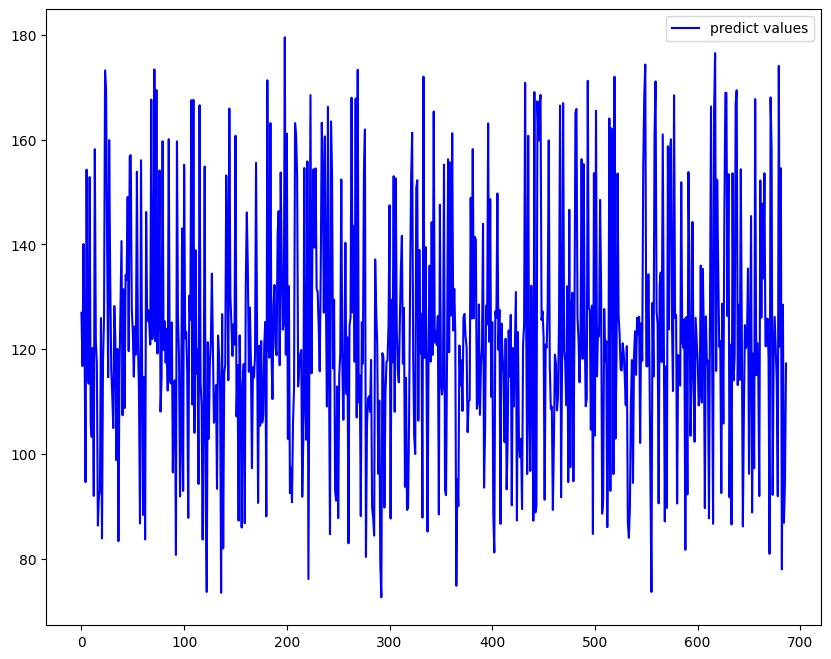

In [17]:
plt.figure(figsize=(10,8))
plt.plot(t_pred,color='blue', label='predict values')
plt.legend()

In [19]:
error_score=metrics.r2_score(ytest,t_pred)
error_score

0.9876701080823808

In [20]:
mae = metrics.mean_absolute_error(ytest, t_pred)
mse = metrics.mean_squared_error(ytest, t_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(ytest,t_pred)

In [21]:
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 1.3611510692139726
MSE: 6.582931926725479
RMSE: 2.5657224960477465
R-Squared: 0.9876701080823808
